# Linear Regression Example

Linear regression implementation with TensorFlow v2 library.

This example is using a low-level approach to better understand all mechanics behind the training process.

- Original Author: Aymeric Damien
- Author: Ron Li
- Project: https://github.com/rongpenl/TensorFlow-Examples/

In [1]:
import tensorflow as tf
import numpy as np
rng = np.random

In [2]:
# Parameters.
learning_rate = 0.01
training_steps = 1000
display_step = 50

In [3]:
# Training Data.
X = np.array([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,
              7.042,10.791,5.313,7.997,5.654,9.27,3.1])
Y = np.array([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,
              2.827,3.465,1.65,2.904,2.42,2.94,1.3])


In [4]:
# Weight and Bias, initialized randomly.
W = tf.Variable(rng.randn(), name="weight")
b = tf.Variable(rng.randn(), name="bias")

# Linear regression (Wx + b).
def linear_regression(x):
    return W * x + b

# Mean square error.
def mean_square(y_pred, y_true):
    return tf.reduce_mean(tf.square(y_pred - y_true))

# Stochastic Gradient Descent Optimizer.
optimizer = tf.optimizers.SGD(learning_rate)

Let's investigate the variables.

In [5]:
type(W)

tensorflow.python.ops.resource_variable_ops.ResourceVariable

The variable `W`, as well as `b`, is trainable, which means its value can be updated by training operations.

In [6]:
W.trainable

True

In [7]:
# Optimization process. 
def run_optimization():
    # Wrap computation inside a GradientTape for automatic differentiation.
    with tf.GradientTape() as g:
        pred = linear_regression(X)
        loss = mean_square(pred, Y)
    # Compute gradients.
    gradients = g.gradient(loss, [W, b])
    
    # Update W and b following gradients.
    optimizer.apply_gradients(zip(gradients, [W, b]))

Let's decompose this function.

What this does is to `tape`, or `record` the operations and create a `gradient` object from the `tape`.

In [8]:
with tf.GradientTape() as g:
    pred = linear_regression(X)
    loss = mean_square(pred, Y)
# Compute gradients.
gradients = g.gradient(loss, [W, b])
# Update W and b following gradients.
optimizer.apply_gradients(zip(gradients, [W, b]));

In case you forget what `zip` does.

In [40]:
list(zip([1,2],["a","b"]))

[(1, 'a'), (2, 'b')]

In [9]:
type(gradients[0])

tensorflow.python.framework.ops.EagerTensor

You have 2 pairs, each pair contains a gradient `operator`, `tensorflow.python.framework.ops.EagerTensor`, and a trainable variable. 

In [38]:
list(zip(gradients, [W, b]))

[(<tf.Tensor: shape=(), dtype=float32, numpy=-0.00018316507>,
  <tf.Variable 'weight:0' shape=() dtype=float32, numpy=0.25088635>),
 (<tf.Tensor: shape=(), dtype=float32, numpy=0.0012977943>,
  <tf.Variable 'bias:0' shape=() dtype=float32, numpy=0.8041081>)]

If you apply the gradients according to the `optimizer`'s rule, you see the optimizer actually records how many steps have passed. In this case **2** because we have run it once.

In [10]:
optimizer.apply_gradients(zip(gradients, [W, b]))

<tf.Variable 'UnreadVariable' shape=() dtype=int64, numpy=2>

In [13]:
# Run training for the given number of steps.
for step in range(1, training_steps + 1):
    # Run the optimization to update W and b values.
    run_optimization()
    if step % display_step == 0:
        pred = linear_regression(X)
        loss = mean_square(pred, Y)
        print("step: %i, loss: %f, W: %f, b: %f" % (step, loss, W.numpy(), b.numpy()))

step: 50, loss: 0.218061, W: 0.353214, b: 0.078655
step: 100, loss: 0.204207, W: 0.341589, b: 0.161065
step: 150, loss: 0.193343, W: 0.331295, b: 0.234045
step: 200, loss: 0.184823, W: 0.322179, b: 0.298674
step: 250, loss: 0.178141, W: 0.314106, b: 0.355906
step: 300, loss: 0.172902, W: 0.306957, b: 0.406589
step: 350, loss: 0.168792, W: 0.300627, b: 0.451472
step: 400, loss: 0.165570, W: 0.295020, b: 0.491219
step: 450, loss: 0.163043, W: 0.290055, b: 0.526418
step: 500, loss: 0.161061, W: 0.285659, b: 0.557588
step: 550, loss: 0.159506, W: 0.281765, b: 0.585192
step: 600, loss: 0.158288, W: 0.278317, b: 0.609636
step: 650, loss: 0.157332, W: 0.275264, b: 0.631284
step: 700, loss: 0.156582, W: 0.272560, b: 0.650454
step: 750, loss: 0.155994, W: 0.270165, b: 0.667430
step: 800, loss: 0.155533, W: 0.268045, b: 0.682464
step: 850, loss: 0.155172, W: 0.266167, b: 0.695777
step: 900, loss: 0.154888, W: 0.264504, b: 0.707567
step: 950, loss: 0.154666, W: 0.263031, b: 0.718007
step: 1000, l

In [14]:
import matplotlib.pyplot as plt

`W` and `b` values got updated.

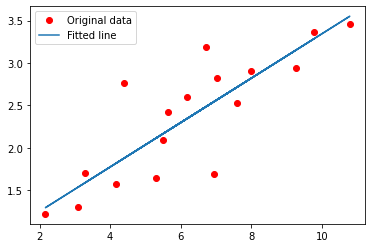

In [15]:
# Graphic display
plt.plot(X, Y, 'ro', label='Original data')
plt.plot(X, np.array(W * X + b), label='Fitted line')
plt.legend()
plt.show()